In [80]:
import numpy as np
import math
import transforms3d as T

Problem 2

1. 

$\frac{p+q}{2}= \frac{1}{\sqrt2}+\frac{1}{2\sqrt2}i+\frac{1}{2\sqrt2}j$\
The norm $\| \frac{p+q}{2} \|$ is $\frac{\sqrt3}{2}$ .\
The quaternion $r$ is $\frac{\sqrt6}{3}+\frac{\sqrt6}{6}i+\frac{\sqrt6}{6}j$

Rotation matrix of $r$ is 
$$
M(r) = 
\left[ 
    \begin{matrix}
    \frac{2}{3} & \frac{1}{3} & \frac{2}{3} \\
    \frac{1}{3} & \frac{2}{3} & -\frac{2}{3} \\
    -\frac{2}{3} & \frac{2}{3} & \frac{1}{3} 
    \end{matrix}
\right]
$$

The axis $M(r)$ rotates is 
$$\left[ \frac{\sqrt2}{2}, \frac{\sqrt2}{2},0\right]^T$$
The angle of rotation is $70.53^\circ .$

In [81]:
r_quat = [math.sqrt(6)/3,math.sqrt(6)/6,math.sqrt(6)/6,0]
r_mat = T.quaternions.quat2mat(r_quat)
print('The rotation matrix of r is \n',r_mat)
r_vec,r_theta = T.quaternions.quat2axangle(r_quat)
print('The aixs M(r) rotate is ',r_vec)
print('The angle of rotation is ',np.rad2deg(r_theta))

The rotation matrix of r is 
 [[ 0.66666667  0.33333333  0.66666667]
 [ 0.33333333  0.66666667 -0.66666667]
 [-0.66666667  0.66666667  0.33333333]]
The aixs M(r) rotate is  [0.70710678 0.70710678 0.        ]
The angle of rotation is  70.52877936550931


2.

The exponential coordinates of $p$ is $\left[ \frac{\pi}{2},0,0 \right]$.\
The exponential coordinates of $q$ is $\left[ 0,\frac{\pi}{2},0 \right]$.

In [82]:
p_quat,q_quat = [1/math.sqrt(2),1/math.sqrt(2),0,0],[1/math.sqrt(2),0,1/math.sqrt(2),0]
p_vec,p_theta = T.quaternions.quat2axangle(p_quat)
q_vec,q_theta = T.quaternions.quat2axangle(q_quat)
print("The exponential coordinates are",p_vec*p_theta)
print("The exponential coordinates are",q_vec*q_theta)

The exponential coordinates are [1.57079633 0.         0.        ]
The exponential coordinates are [0.         1.57079633 0.        ]


3.(a)

$$
\left[ \omega_p \right] = \left[ \begin{matrix}0 & 0 &0 \\0 &0 &-\frac{\pi}{2} \\0 &\frac{\pi}{2} &0 \end{matrix} \right]
$$
$$
\left[ \omega_q \right] = \left[ \begin{matrix}0 & 0 &\frac{\pi}{2} \\0 &0 &0 \\-\frac{\pi}{2} &0 &0 \end{matrix} \right]
$$
$$
\exp(\left[ \omega_p \right]) = \left[ \begin{matrix}1 & 0 &0 \\0 &0 &-1 \\0 &1 &0 \end{matrix} \right]
$$
$$
\exp(\left[ \omega_q \right]) = \left[ \begin{matrix}0 & 0 &1 \\0 &1 &0 \\-1 &0 &0 \end{matrix} \right]
$$

In [83]:
def skew_symmetric(array):
    return np.array([[0, -array[2], array[1]], [array[2], 0, -array[0]], [-array[1], array[0], 0]])
print('[p]: \n',skew_symmetric(p_vec*p_theta))
print('[q]: \n',skew_symmetric(q_vec*q_theta))

[p]: 
 [[ 0.         -0.          0.        ]
 [ 0.          0.         -1.57079633]
 [-0.          1.57079633  0.        ]]
[q]: 
 [[ 0.         -0.          1.57079633]
 [ 0.          0.         -0.        ]
 [-1.57079633  0.          0.        ]]


In [84]:
def exp_skew(array,angle):
    ex = np.identity(array.shape[0])+np.sin(angle)*array+(1-np.cos(angle))*array@array
    return ex
print(exp_skew(skew_symmetric(p_vec),p_theta))
print(exp_skew(skew_symmetric(q_vec),q_theta))

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.11022302e-16 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  1.11022302e-16]]
[[ 1.11022302e-16  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  1.11022302e-16]]


3.(b)

$$\exp(\left[ \omega_p \right]+\left[ \omega_q \right])=
\left[ \begin{matrix}
\frac{1}{2}+\frac{\cos(\frac{\pi}{\sqrt2})}{2} & \frac{1}{2}-\frac{\cos(\frac{\pi}{\sqrt2})}{2} & \frac{\sin(\frac{\pi}{\sqrt2})}{\sqrt2}\\
\frac{1}{2}-\frac{\cos(\frac{\pi}{\sqrt2})}{2} & \frac{1}{2}+\frac{\cos(\frac{\pi}{\sqrt2})}{2} & -\frac{\sin(\frac{\pi}{\sqrt2})}{\sqrt2}\\
-\frac{\sin(\frac{\pi}{\sqrt2})}{\sqrt2} & \frac{\sin(\frac{\pi}{\sqrt2})}{\sqrt2} &\cos(\frac{\pi}{\sqrt2})
\end{matrix}
\right]
$$

$$
\exp(\left[ \omega_p \right])\exp(\left[ \omega_q \right])=
\left[
    \begin{matrix}
    0 & 0 & 1\\
    1 & 0 & 0\\
    0 & 1 & 0
    \end{matrix}
\right]
$$

4.(a)

The exponential coordinates of $p^\prime$ is $\left[ -\frac{3\pi}{2},0,0 \right]$.\
The exponential coordinates of $q^\prime$ is $\left[ 0,-\frac{3\pi}{2},0 \right]$.\
$p$ and $-p$, $q$ and $-q$, $r$ and $-r$ represent the same rotation respectively.

So if r is a rotation quaternion, then r and −r will produce the same rotation.\
Proof:
Let $r=\cos(\frac{\theta}{2}) + \sin(\frac{\theta}{2})(i+j+k)$ represent the rotation $\theta$ .\
Rotation $\theta$ and $2\pi-\theta$ are the same rotation. \
$r^\prime=\cos(\frac{2\pi-\theta}{2}) + \sin(\frac{2\pi-\theta}{2})(-i-j-k)=-\cos(\frac{\theta}{2}) - \sin\frac{\theta}{2}(i+j+k)=-r$\
Hence, (r,-r) are the same rotation.

In [79]:
q_prime_quat = -np.array(q_quat)
p_prime_quat = -np.array(p_quat)
q_prime_vec,q_prime_theta = T.quaternions.quat2axangle(q_prime_quat)
p_prime_vec,p_prime_theta = T.quaternions.quat2axangle(p_prime_quat)
print("The exponential coordinates are",p_prime_vec*p_prime_theta)
print("The exponential coordinates are",q_prime_vec*q_prime_theta)

4.71238898038469 [-1. -0. -0.]
The exponential coordinates are [-4.71238898 -0.         -0.        ]
The exponential coordinates are [-0.         -4.71238898 -0.        ]


4(b)

In neural network, we are going to minimize the loss function, which is the L2 distance in the question. If the ground truth is r and the predicted result is -r, the Ls distance is the largest. But actually they represent the same rotation, the loss function should be zero. Therefore, we couldn't use L2 distance to regress the quaternion outputs.

Problem 4

1.

The output of the last case is 

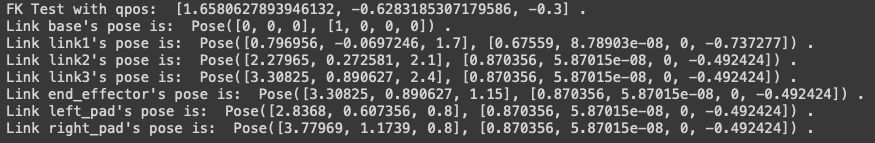

In [2]:
from IPython.display import Image
Image(filename='/Users/wzang/Study/23Win/CSE291/HW1/q4_1.png') 

2.

$$ T(\boldsymbol{\theta}) = \left[ \begin{matrix}
cos(\theta_1 +\theta_2) & sin(\theta_1 +\theta_2) & 0 & 2sin(\theta_1 +\theta_2) + 1.6sin(\theta_1)\\
-sin(\theta_1 +\theta_2) & cos(\theta_1 +\theta_2) & 0 & 2cos(\theta_1 +\theta_2) + 1.6cos(\theta_1)\\
0 & 0 & 1 & -\theta_3 + 0.85\\
0 & 0 & 0 & 1 \\ 
\end{matrix} \right] $$ 

3.

The first two joints, $q_1$ and $q_2$ points to the z-axis in the base frame.(depends on the definition, I defined they rotate the z-axis of base frame pointing downward.) So the two links connected to them must move in x-y plane. The work space of link 1, is a circle with radius of length of link, which is the area joint 2 can reach. Link 2 is rotating along joint 2, so the workspace is a semi-circle given a fixed $q_1$. I tried to plot the horizontal view of work space, which is a ring with inner radius 1.6 and outter radius 4.2 (Assume the base link is origin), as shown below. Because $q_3$ is the primastic joint that only has translational moving ability. The final reachable workspace looks like a hollow cylinder, as shown in the second plot below. The height of this workspace is 2 and range is [-0.9,1.1] in the vertical z axis.

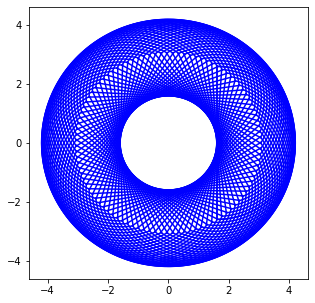

In [32]:
import matplotlib.pyplot as plt
a=np.linspace(0,2*np.pi,100)
b = np.linspace(-np.pi/2,np.pi/2,100)
plt.figure(figsize=(5,5))
plt.plot(1.6*np.cos(a),1.6*np.sin(a))
for i in a:
    plt.plot(1.6*np.cos(i)+2.6*np.cos(i+b),1.6*np.sin(i)+2.6*np.sin(i+b),'b')
    x = 1.6*np.cos(i)+2.6*np.cos(i+b)
    y = 1.6*np.sin(i)+2.6*np.sin(i+b)
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'b')

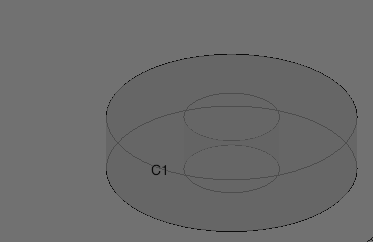

In [1]:
from IPython.display import Image
Image(filename='/Users/wzang/Study/23Win/CSE291/HW1/rw.png') 

4.

$$
q^e = \left[ \begin{matrix}
x_e\\ y_e\\ z_e
\end{matrix}\right] = \left[ \begin{matrix}
0 \\ -0.55 \\ -0.35
\end{matrix}\right], \quad
q^s = \left[ \begin{matrix}
x_s\\ y_s\\ z_s
\end{matrix}\right]
$$


$$
\left[ \begin{matrix}
x_s\\ y_s\\ z_s \\1
\end{matrix}\right]=
T_{s \rightarrow e}(\theta) 
\left[ 
    \begin{matrix}
x_e\\ y_e\\ z_e \\1
\end{matrix}\right],
$$

$$
q^s  =
\left[ \begin{matrix}
x_s\\ y_s\\ z_s 
\end{matrix}\right]=
\left[ \begin{matrix}
1.45sin(\theta_1 +\theta_2) + 1.6sin(\theta_1) \\
1.45cos(\theta_1 +\theta_2) + 1.6cos(\theta_1)  \\
0.5 -\theta_3
\end{matrix} \right]
$$

$$\dot{q^s} = \left[ \begin{matrix}
\dot{x_s}\\ \dot{y_s}\\ \dot{z_s} 
\end{matrix}\right] = 
\left[ \begin{matrix}
1.45cos(\theta_1 +\theta_2) + 1.6sin(\theta_1) \\
-1.45sin(\theta_1 +\theta_2) - 1.6sin(\theta_1)  \\
0
\end{matrix} \right] \dot{\theta_1} + 
\left[ \begin{matrix}
1.45cos(\theta_1 +\theta_2) \\
-1.45sin(\theta_1 +\theta_2) \\
0
\end{matrix} \right] \dot{\theta_2} +
\left[\begin{matrix} 0\\0\\-1 \end{matrix}\right] \dot{\theta_3}
$$

Given $\theta=\left[-\frac{\pi}{6},\frac{\pi}{6},\frac{1}{2}\right]$, $\dot{\theta}=\left[1,2,1\right]$, 
$$\dot{q^s} = \left[
    \begin{matrix}
    4.2856\\0.8\\-1
    \end{matrix}
 \right]$$

$$
T_{s \rightarrow e}^{-1} = 
\left[ \begin{matrix}
cos(\theta_1 +\theta_2) & -sin(\theta_1 +\theta_2) & 0 & 1.6sin(\theta_2)\\
sin(\theta_1 +\theta_2) & cos(\theta_1 +\theta_2) & 0 & -1.6cos(\theta_2)-2\\
0 & 0 & 1 & \theta_3 - 0.85 \\
0 & 0 & 0 & 1
\end{matrix} \right]
$$

$$
\dot{q^e}  =
\left[ \begin{matrix}
\dot{x_e}\\ \dot{y_e}\\ \dot{z_e} 
\end{matrix}\right]
=\left[ \begin{matrix}
5.08564 \\ -2.58564 \\ -1.35
\end{matrix}\right]


$$

Problem 4 Contributions

Group member: Wenshuo Zang, Zhaofang Qian
Both member are involved in the discussion, understanding the questions and API and getting the solutions.
Wenshuo and Zhaofang solved the problem 1 together.
Wenshuo did the first two questions analyzing and the calulation of rest questions of problem 2. Zhaofang did the first two questions calculation and the analyzing of the rest of questions of problem 2.
Wenshuo did the derivations and coding of the problem 3. Zhaofang analyzed, calculated the results, and verified the results of problem 3.